In [1]:
import os
import sys
sys.path.append("../pyFiles/")
sys.path.append("../")

import evaluateSegAlgo as ev
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

    
import logging

#fmt = 'logging.Formatter(''%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
fmt = '%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
logging.basicConfig(level=logging.INFO, format=fmt)
logger = logging.getLogger(__name__)

np.set_printoptions(precision=2)

In [2]:
import pickle

file = open('../sessionFiles.pickle', 'rb')
allSessions = pickle.load(file)
file.close()

sessionDict = allSessions[0]
sessionDict.keys()

dict_keys(['subID', 'trialInfo', 'expConfig', 'rawExpUnity', 'rawExpGaze', 'processedExp', 'rawCalibUnity', 'rawCalibGaze', 'processedCalib', 'analysisParameters', 'calibrationQuality'])

In [3]:
import copy
sessionIn = copy.deepcopy(sessionDict)

In [4]:
sessionDict = ev.calcTrialLevelCalibInfo(sessionDict);
sessionDict = ev.calcSphericalCoordinates(sessionDict,'targetPos','targetWorldSpherical', sessionDictKey = 'processedCalib')
sessionDict = ev.calcSphericalCoordinates(sessionDict,'targeLocalPos','targetLocalSpherical', sessionDictKey = 'processedCalib')

sessionDict = ev.calcSphericalCoordinates(sessionDict,'gaze-normal0','gaze0Spherical', sessionDictKey = 'processedCalib',flipY=False)
sessionDict = ev.calcSphericalCoordinates(sessionDict,'gaze-normal1','gaze1Spherical', sessionDictKey = 'processedCalib',flipY=False)
sessionDict = ev.calcSphericalCoordinates(sessionDict,'gaze_normal2','gaze2Spherical', sessionDictKey = 'processedCalib',flipY=False)

sessionDict = ev.calcGazeToTargetFixError(sessionDict,'gaze0Spherical','targetLocalSpherical','fixError_eye0' )
sessionDict = ev.calcGazeToTargetFixError(sessionDict,'gaze1Spherical','targetLocalSpherical','fixError_eye1')
sessionDict = ev.calcGazeToTargetFixError(sessionDict,'gaze2Spherical','targetLocalSpherical','fixError_eye2')

sessionDict = ev.calcAverageGazeDirPerTrial(sessionDict)
sessionDict = ev.calcFixationStatistics(sessionDict, confidenceThresh=False)

INFO_evaluateSegAlgo-calcTrialLevelCalibInfo(): - Added sessionDict['trialInfo']['targetType']
INFO_evaluateSegAlgo-calcTrialLevelCalibInfo(): - Added sessionDict['trialInfo']['gridSize']
INFO_evaluateSegAlgo-calcTrialLevelCalibInfo(): - Added sessionDict['trialInfo']['fixTargetSpherical']
INFO_evaluateSegAlgo-calcSphericalCoordinates(): - Added sessionDict['processedCalib']['targetWorldSpherical','az']
INFO_evaluateSegAlgo-calcSphericalCoordinates(): - Added sessionDict['processedCalib']['targetWorldSpherical','el']
INFO_evaluateSegAlgo-calcSphericalCoordinates(): - Added sessionDict['processedCalib']['targetLocalSpherical','az']
INFO_evaluateSegAlgo-calcSphericalCoordinates(): - Added sessionDict['processedCalib']['targetLocalSpherical','el']
INFO_evaluateSegAlgo-calcSphericalCoordinates(): - Added sessionDict['processedCalib']['gaze0Spherical','az']
INFO_evaluateSegAlgo-calcSphericalCoordinates(): - Added sessionDict['processedCalib']['gaze0Spherical','el']
INFO_evaluateSegAlgo-calc

<IPython.core.display.Javascript object>


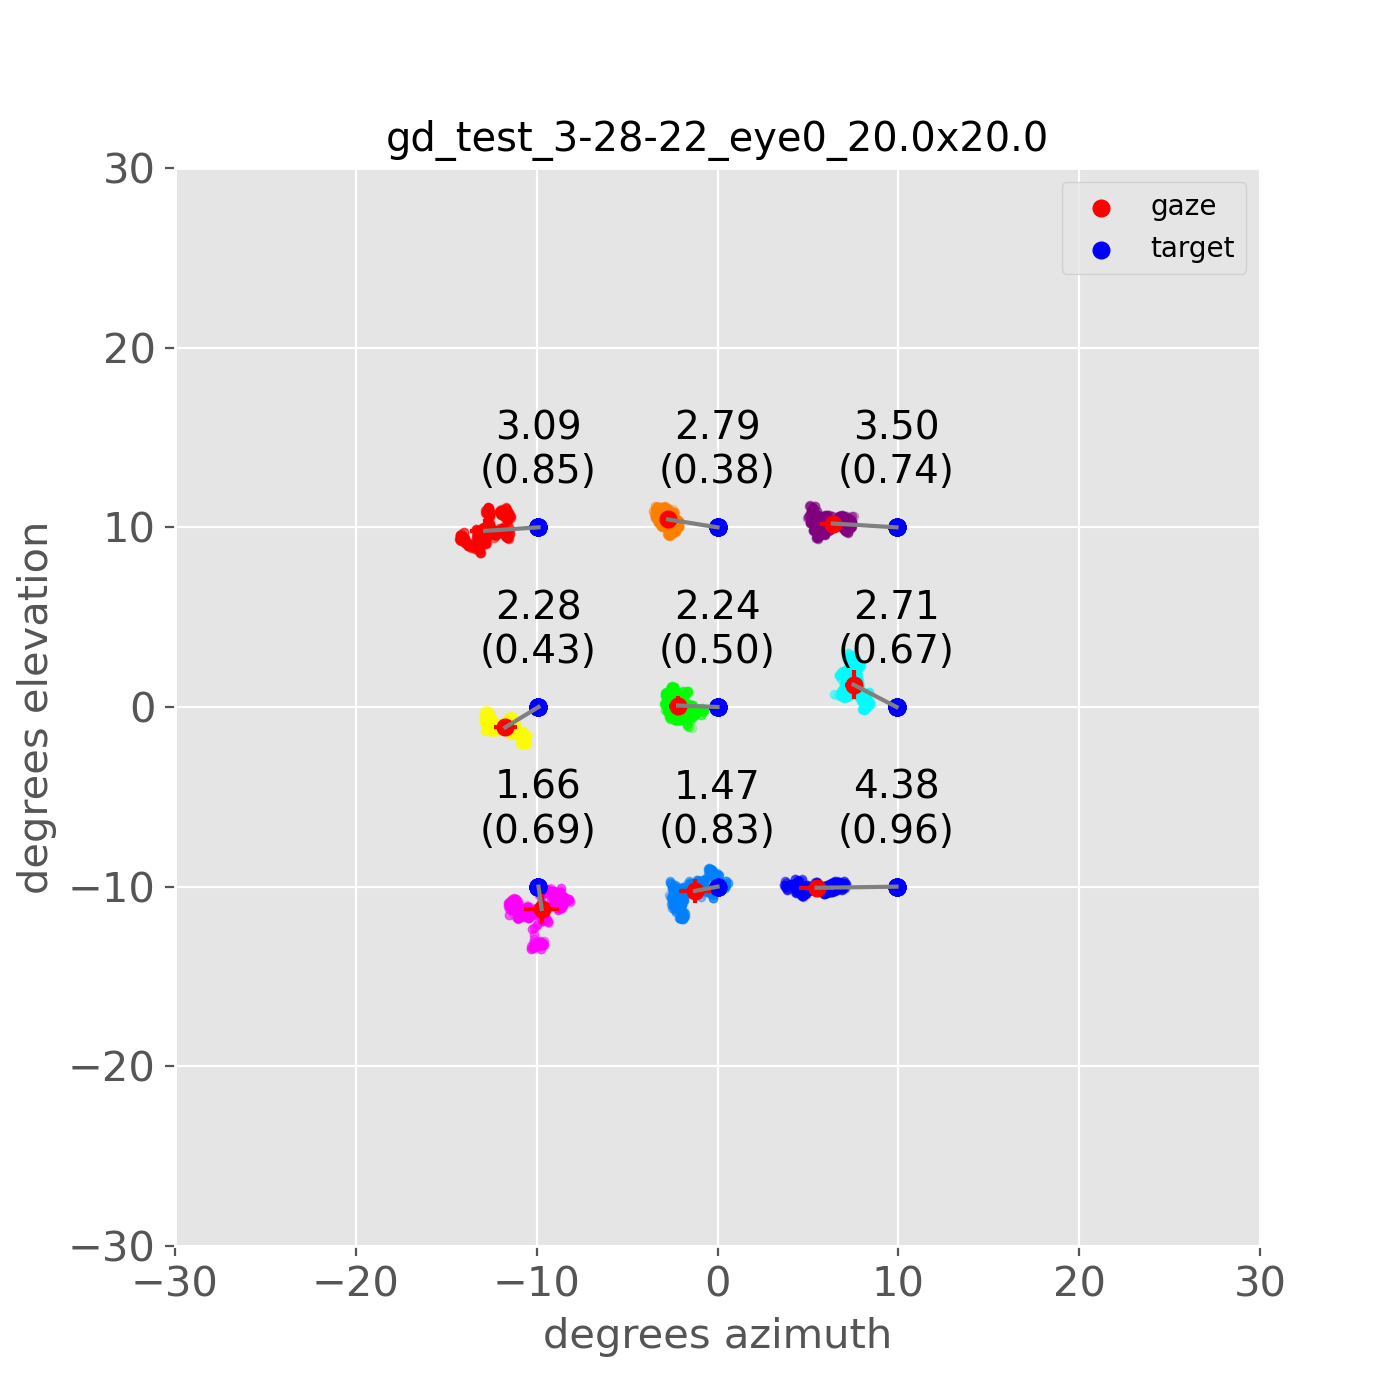

<IPython.core.display.Javascript object>


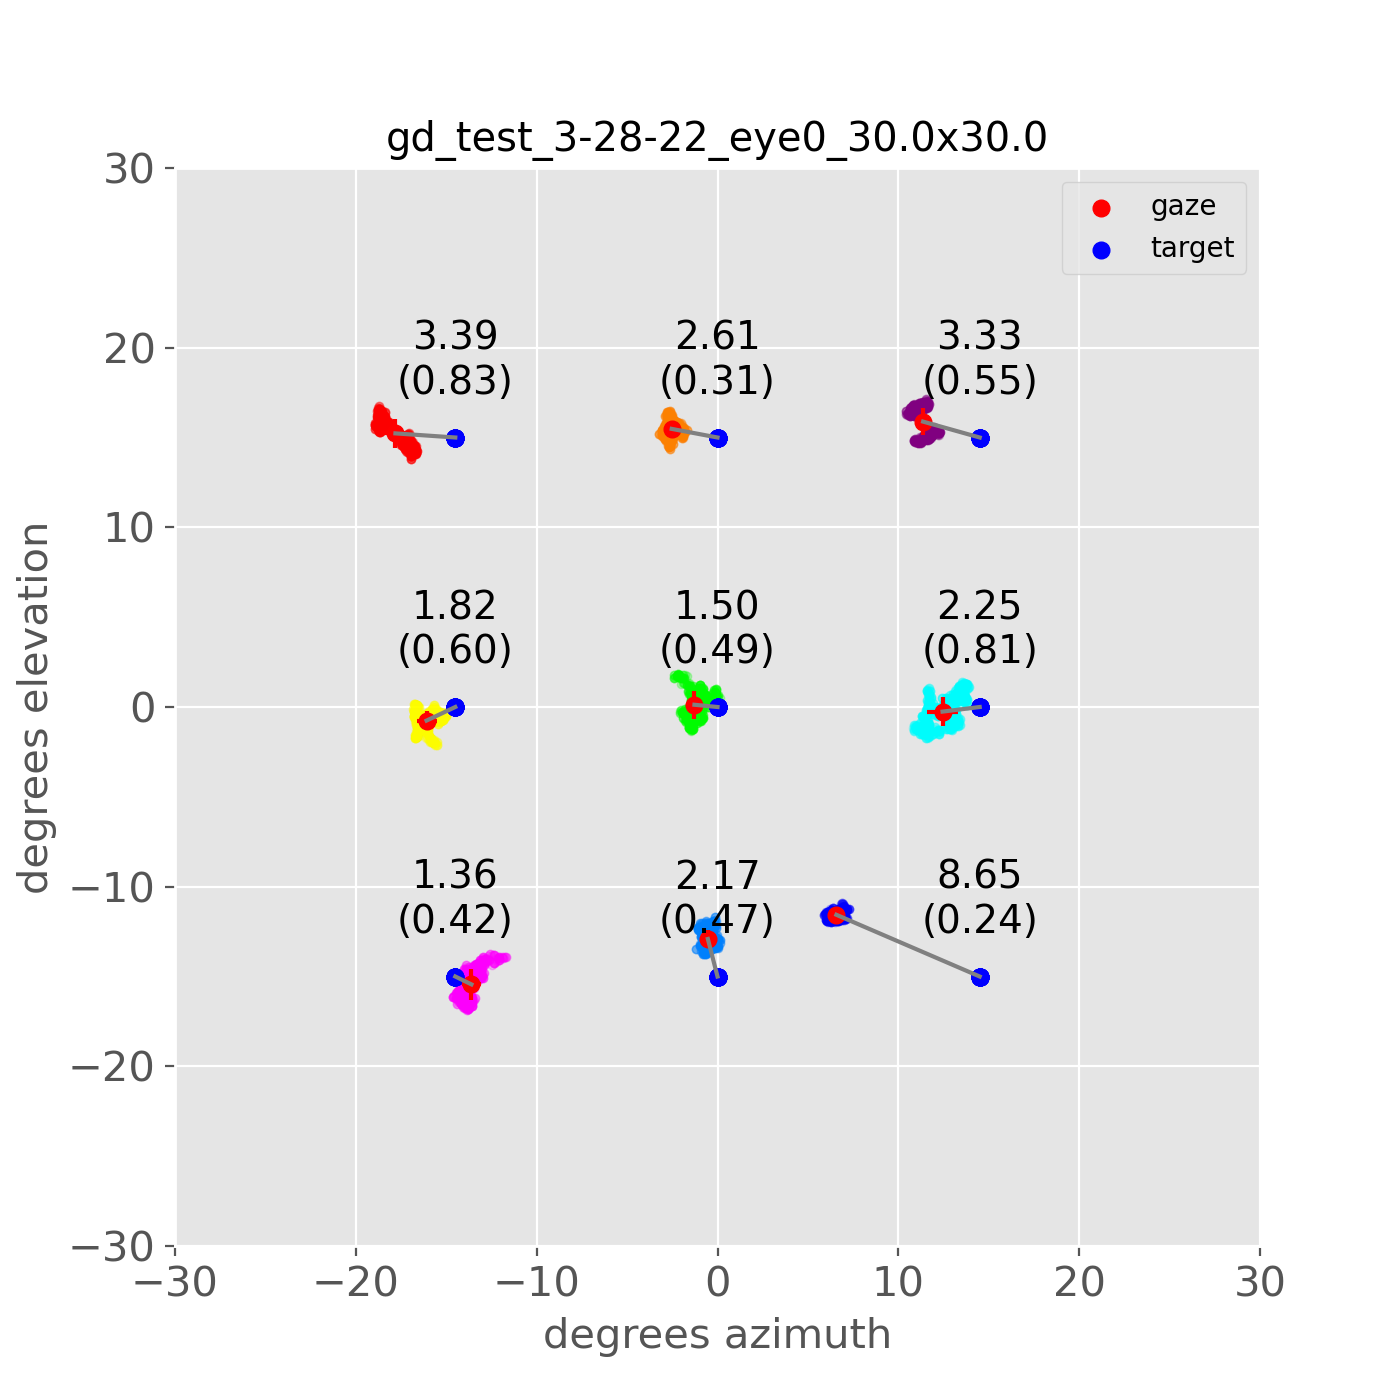

<IPython.core.display.Javascript object>


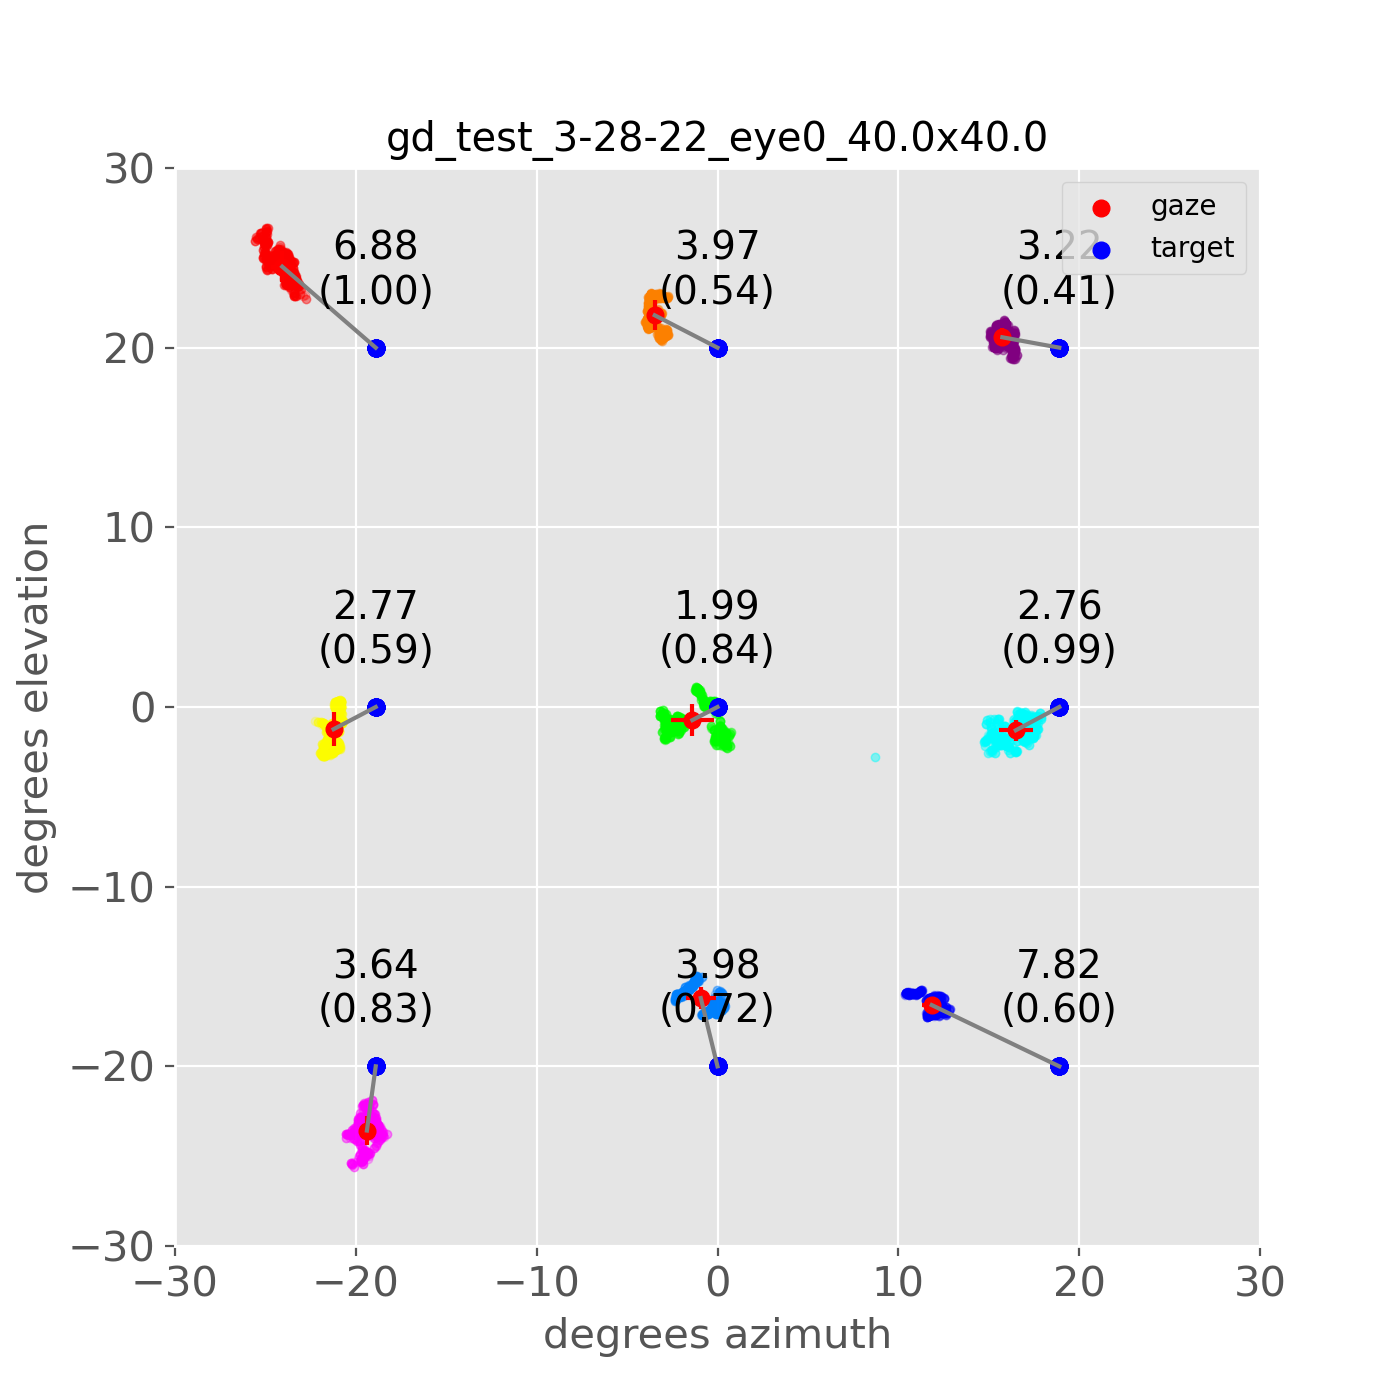

<IPython.core.display.Javascript object>


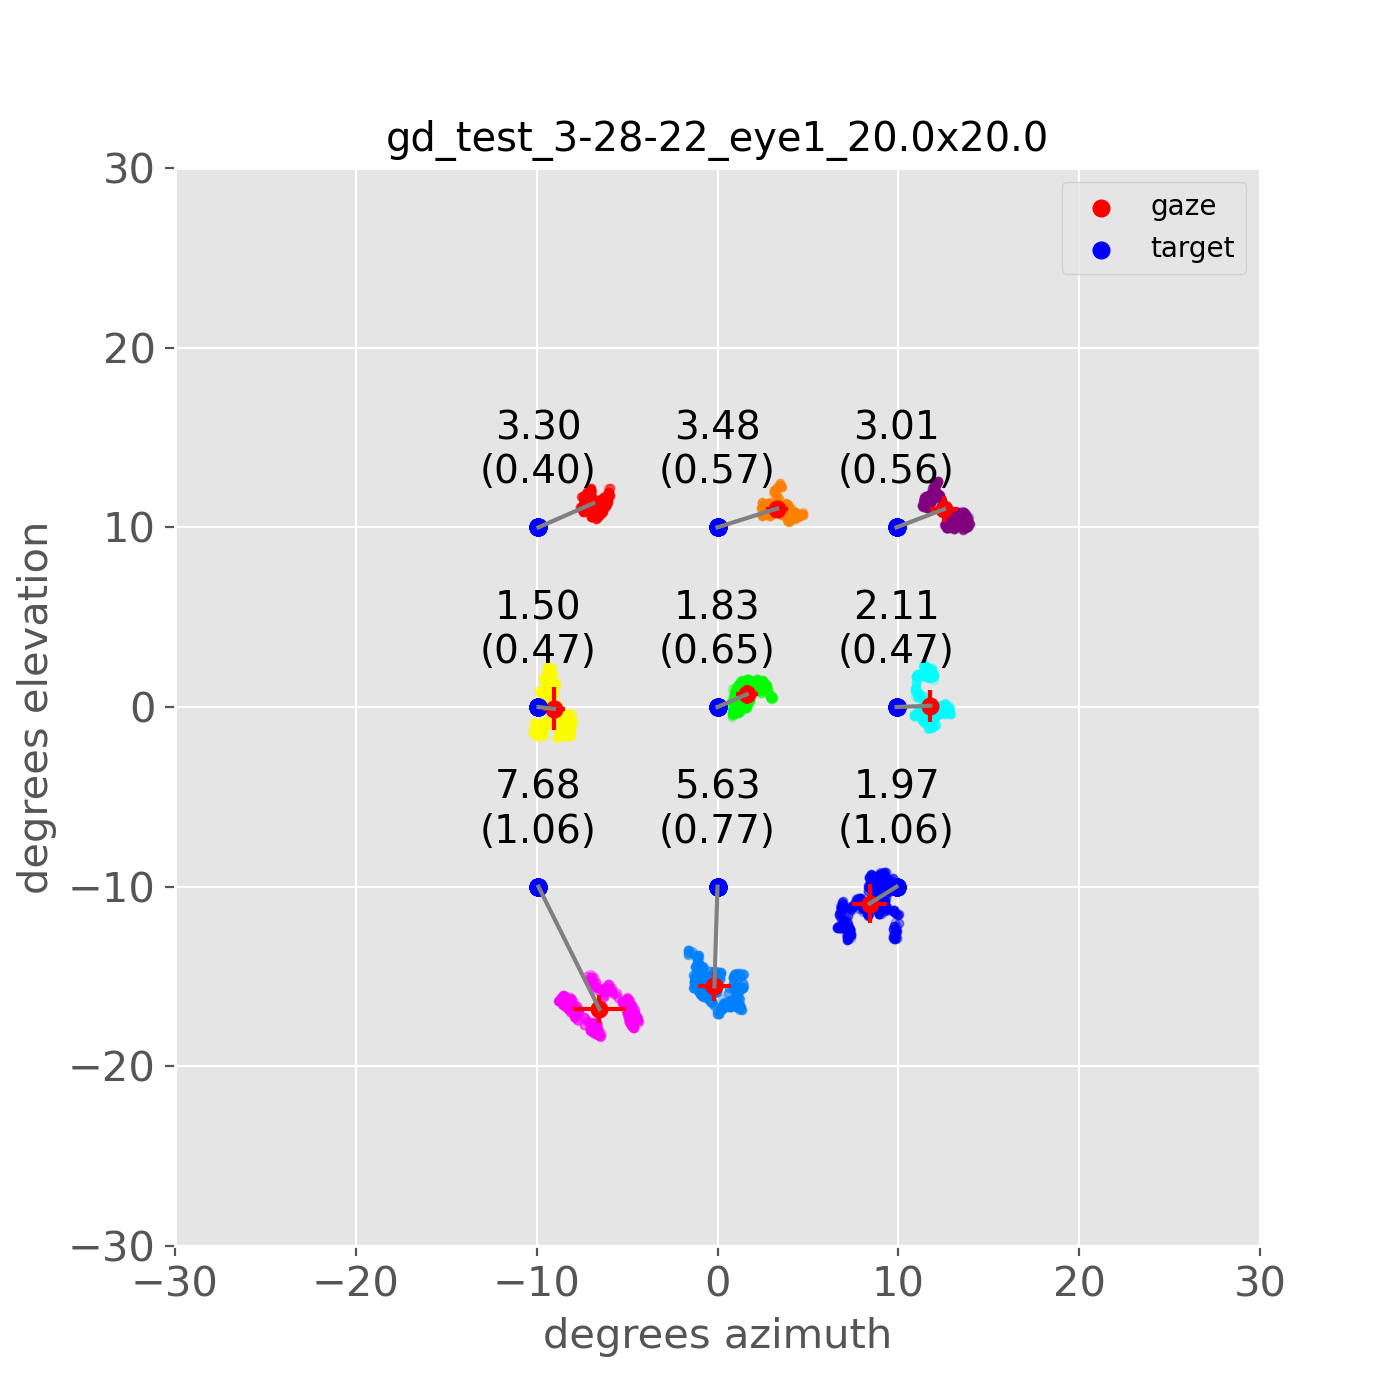

<IPython.core.display.Javascript object>


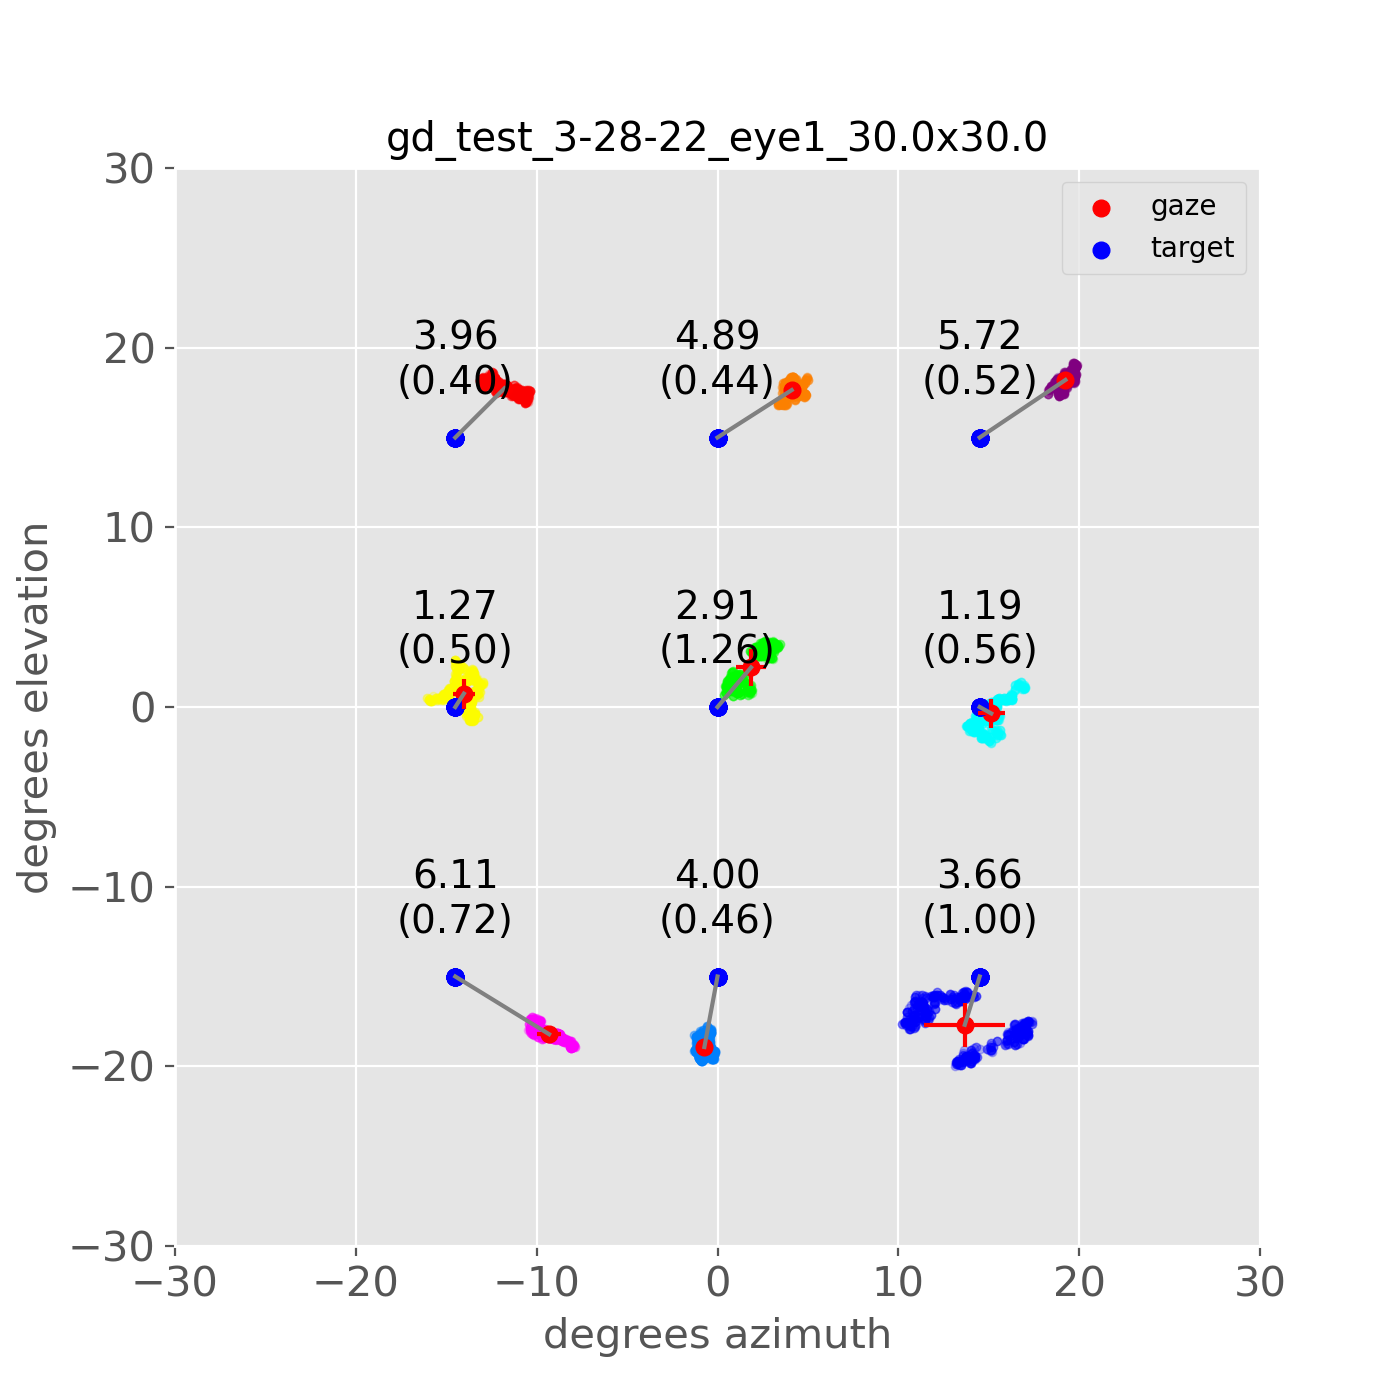

<IPython.core.display.Javascript object>


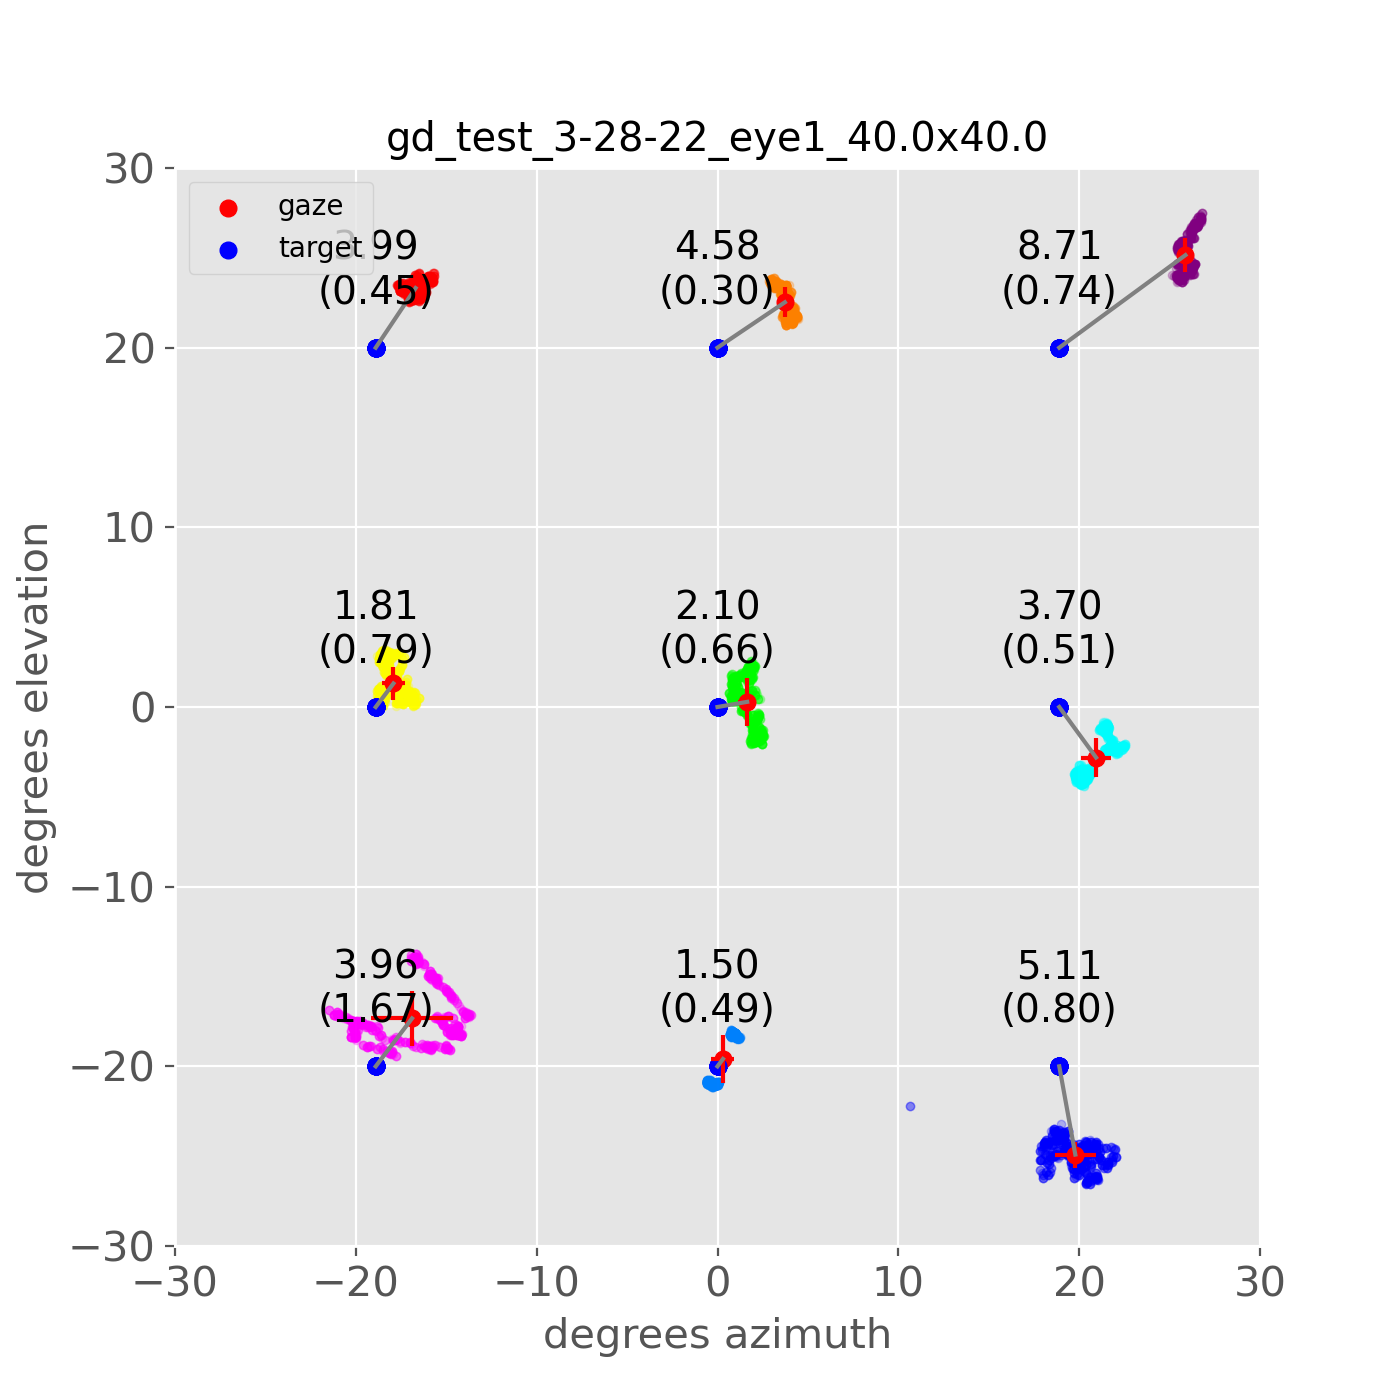

In [5]:
ev.plotFixAssessment(sessionDict, saveDir = '../figout/'+ sessionDict['subID'] +"/")

In [7]:
# dataFolderList = []
# [dataFolderList.append(name) for name in os.listdir("Data/") if name[0] is not '.']

# allSessionData = []
# for subNum, subString in enumerate(dataFolderList):

#     sessionDict = unpackSession(subNum,doNotLoad=False)
#     sessionDict = calibAssessment(sessionDict,saveDir = 'figout/'+subString+"/", confidenceThresh = False)

#     allSessionData.append(sessionDict)

# with open('../allSessionData.pickle', 'wb') as handle:
#     pickle.dump(allSessionData, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
# saveDir = 'figout/gd_test_3-28-22/'

# directory = os.path.dirname(saveDir)

# os.mkdir('figout')


# # try:
# #     os.stat(saveDir)
# # except:
# #     os.mkdir(saveDir)

# # plt.savefig(saveDir + figTitle + '.png')